# Project Overview

The purpose of this project is to explore biodiversity data provided by the National Parks Service, focusing on various species observed across different national park locations.

The project involves scoping, analyzing, preparing, and visualizing data, aiming to uncover insights and explain the findings.

Below are the key questions this project aims to address:

- What is the distribution of conservation statuses among species?  
- Are certain species categories more prone to being endangered?  
- Do species and their conservation statuses show significant differences?  
- Which animal species are most commonly observed, and how are they distributed across parks?  

**Data Sources**

The data for this project includes two files: *Observations.csv* and *Species_info.csv*, both provided by Codecademy.com.

*Note:* Although inspired by real-world data, the datasets used in this project are largely fictional.

### Project Scope and Objectives

Defining a clear project scope is essential when embarking on any new endeavor. To guide this project effectively, it has been structured into four sections: project goals, data, analysis, and evaluation.  

1. **Project Goals:**  
   This section outlines the overarching objectives and sets the foundation for the project's direction. The primary focus is to adopt the perspective of a biodiversity analyst working for the National Parks Service, aiming to preserve biodiversity and protect at-risk species within park boundaries. Key questions to explore include:  
   - What is the distribution of conservation statuses among species?  
   - Are certain categories of species more likely to face endangerment?  
   - Are the differences between species and their conservation statuses statistically significant?  
   - Which species are most prevalent, and how are they distributed across parks?  

2. **Data:**  
   This project utilizes two datasets provided with the package. The first, *Species_info.csv*, contains information on various species, while the second, *Observations.csv*, provides records of species sightings across park locations. These datasets will be assessed to ensure they align with the project's objectives.  

3. **Analysis:**  
   Analytical techniques will be employed to extract insights from the data. This includes the use of descriptive statistics, data visualizations, and statistical inference. Key areas of focus will include:  
   - Distributions and counts of species and conservation statuses  
   - Relationships between species categories  
   - Observations of species across different parks  

4. **Evaluation:**  
   The final stage involves revisiting the original goals to ensure the analysis addresses the posed questions. This step will also reflect on key findings, identify unanswered questions, and highlight any limitations or opportunities for methodological improvements.

**Summary**  
By structuring the project into these key sections, a clear pathway is established for analyzing biodiversity data and generating meaningful insights.

### Import Python Modules

In [7]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# For displaying warnings (optional)
import warnings
warnings.filterwarnings("ignore")

# Set visualization style (optional, can customize)
sns.set_style("whitegrid")


### Loading the Data

To examine the conservation status of species and their observations within national parks, the datasets are loaded into DataFrames for analysis. Once the data is loaded, it can be explored and visualized using Python tools.

In the following steps, the *Observations.csv* and *Species_info.csv* files are imported into DataFrames named `observations` and `species`, respectively. The contents of these DataFrames are previewed using the `.head()` method to ensure the data has been loaded correctly.

**Species Data**  
The *Species_info.csv* file contains details about various species observed in National Parks. Key columns in this dataset include:  

- **category:** The taxonomic category of each species  
- **scientific_name:** The scientific name for each species  
- **common_names:** The commonly known names of each species  
- **conservation_status:** The conservation status of each species

In [23]:
# Import necessary modules
import pandas as pd
from tabulate import tabulate

# Load the datasets into DataFrames
species = pd.read_csv('Species_info.csv')
observations = pd.read_csv('Observations.csv')

# Preview the first few rows of each DataFrame as formatted tables
print("Preview of species DataFrame:")
print(tabulate(species.head(), headers='keys', tablefmt='grid'))

print("\nPreview of observations DataFrame:")
print(tabulate(observations.head(), headers='keys', tablefmt='grid'))


Preview of species DataFrame:
+----+------------+-------------------------------+----------------------------------------------------------------+-----------------------+
|    | category   | scientific_name               | common_names                                                   |   conservation_status |
+====+============+===============================+================================================================+=======================+
|  0 | Mammal     | Clethrionomys gapperi gapperi | Gapper's Red-Backed Vole                                       |                   nan |
+----+------------+-------------------------------+----------------------------------------------------------------+-----------------------+
|  1 | Mammal     | Bos bison                     | American Bison, Bison                                          |                   nan |
+----+------------+-------------------------------+----------------------------------------------------------------+--------

### Exploring the Data

#### Steps Performed:
1. **Distribution of Conservation Status:** Used `value_counts()` to count occurrences and plotted the data using Seaborn.
2. **Species More Likely to Be Endangered:** Grouped and stacked bar chart to show conservation status distribution by species category.
3. **Statistical Significance:** Created a contingency table and performed a Chi-squared test with `chi2_contingency`.
4. **Most Spotted Species at Each Park:** Grouped by `park_name` and `scientific_name` to find the species with the highest observation count per park.

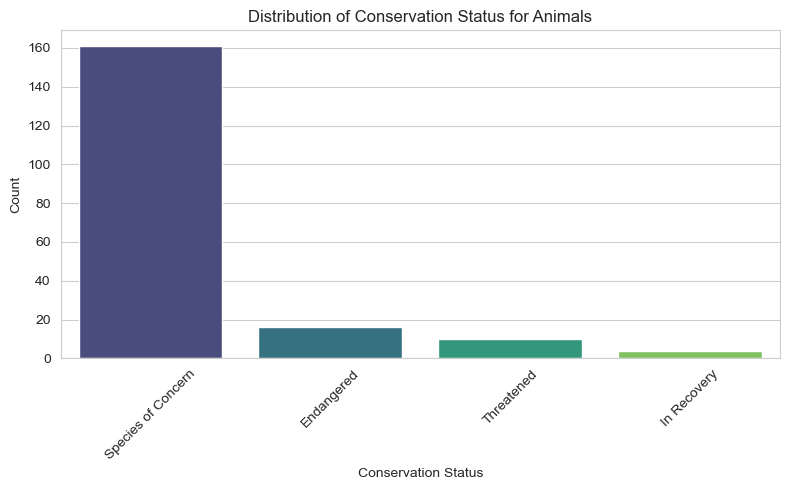

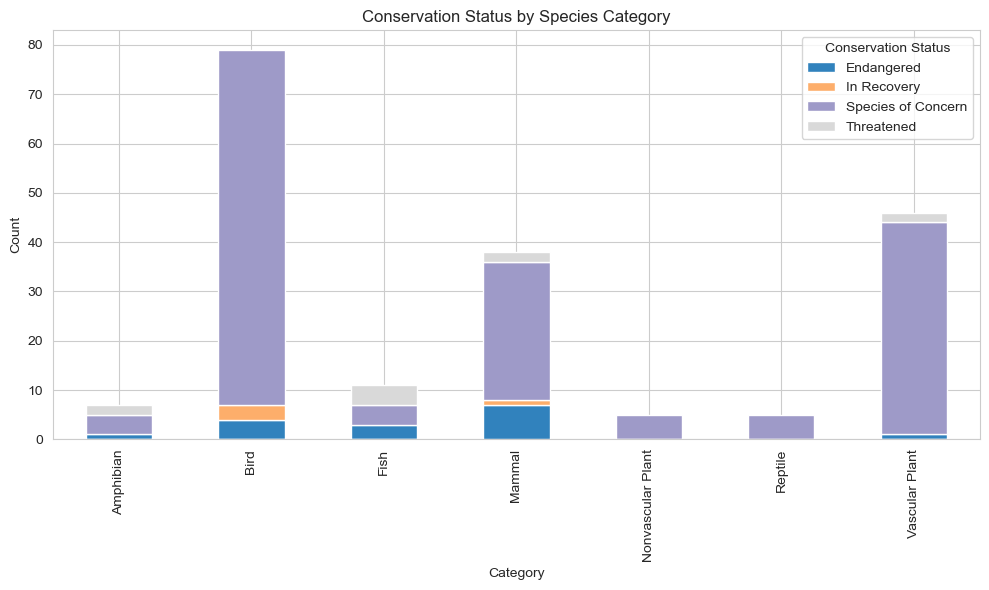

Chi-squared Test Results:
Chi-squared value: 53.91636314015659
p-value: 1.8909788349761653e-05
Degrees of Freedom: 18

Most Spotted Species at Each Park:
                                 park_name        scientific_name  \
1359                   Bryce National Park          Columba livia   
10534  Great Smoky Mountains National Park  Streptopelia decaocto   
13534            Yellowstone National Park         Holcus lanatus   
19178               Yosemite National Park   Hypochaeris radicata   

       observations  
1359            339  
10534           256  
13534           805  
19178           505  


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import pandas as pd

# Load datasets (assuming they are already loaded as `species` and `observations`)

# 1. Distribution of conservation_status for animals
conservation_counts = species['conservation_status'].value_counts(dropna=False)

# Plot the distribution of conservation status
plt.figure(figsize=(8, 5))
sns.barplot(x=conservation_counts.index, y=conservation_counts.values, palette="viridis")
plt.title('Distribution of Conservation Status for Animals')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Are certain types of species more likely to be endangered?
species_endangered = species[species['conservation_status'].notna()]
category_conservation = species_endangered.groupby(['category', 'conservation_status']).size().unstack()

# Plot conservation status by category
category_conservation.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="tab20c")
plt.title('Conservation Status by Species Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Conservation Status')
plt.tight_layout()
plt.show()

# 3. Are the differences between species and their conservation status significant?
# Create contingency table
contingency_table = pd.crosstab(species['category'], species['conservation_status'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared Test Results:")
print(f"Chi-squared value: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")

# 4. Which species were spotted the most at each park?
most_spotted = observations.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()
most_spotted = most_spotted.sort_values(['park_name', 'observations'], ascending=[True, False]).groupby('park_name').head(1)

print("\nMost Spotted Species at Each Park:")
print(most_spotted)


### Additional Analysis

#### Species Diversity Across Parks

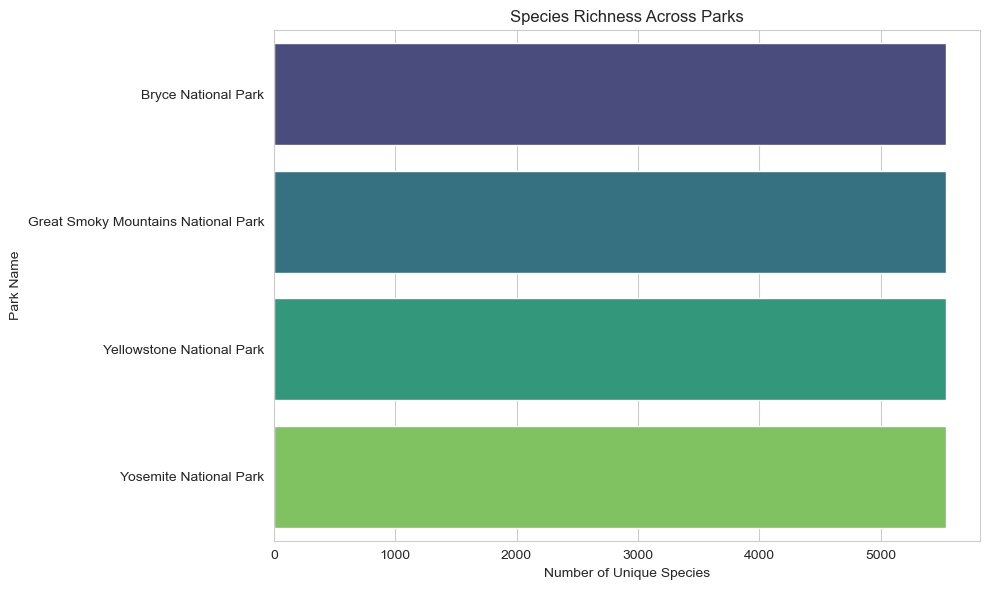

In [38]:
# Count the number of unique species observed in each park
species_diversity = observations.groupby('park_name')['scientific_name'].nunique().sort_values(ascending=False)

# Plot species richness by park
plt.figure(figsize=(10, 6))
sns.barplot(x=species_diversity.values, y=species_diversity.index, palette="viridis")
plt.title('Species Richness Across Parks')
plt.xlabel('Number of Unique Species')
plt.ylabel('Park Name')
plt.tight_layout()
plt.show()


#### Correlation Between Observations and Conservation Status

Analyze if species with higher conservation concerns are observed less frequently

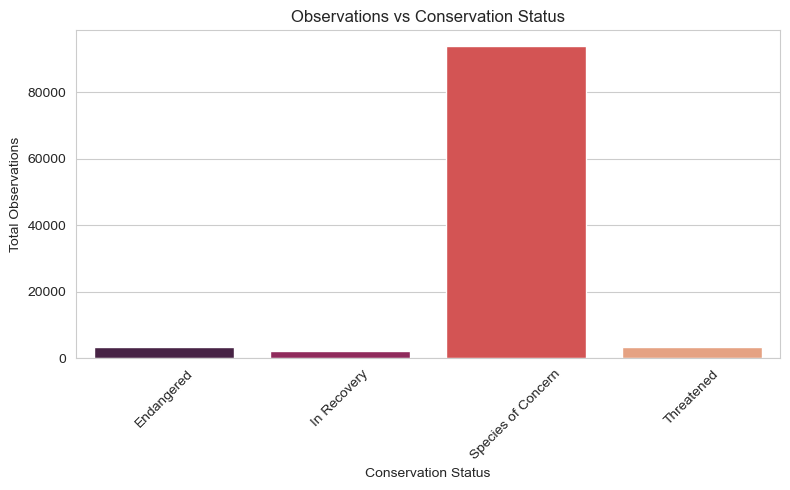

In [42]:
# Merge species and observations data on 'scientific_name'
merged_data = pd.merge(observations, species, on='scientific_name')

# Group by conservation status and calculate the total number of observations
status_observations = merged_data.groupby('conservation_status')['observations'].sum().reset_index()

# Plot the relationship
plt.figure(figsize=(8, 5))
sns.barplot(x='conservation_status', y='observations', data=status_observations, palette="rocket")
plt.title('Observations vs Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Total Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Rare vs. Common Species

Identify and analyze species with extremely low or high observation counts

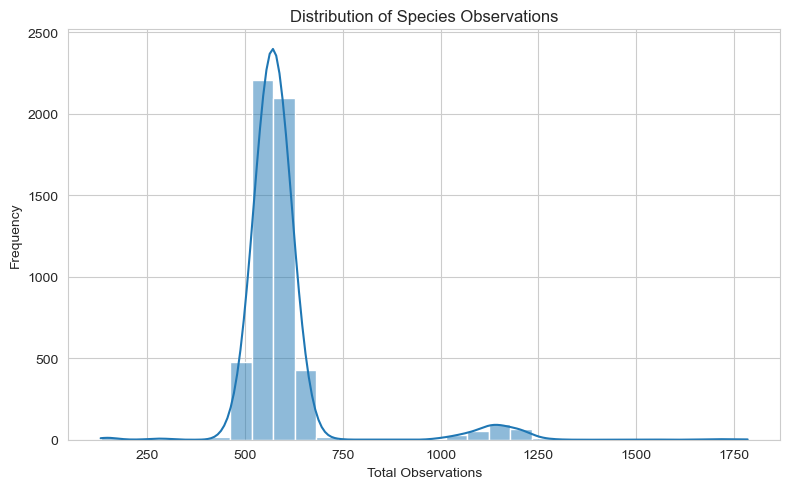

Rare Species (observations < 10 ):
Empty DataFrame
Columns: [scientific_name, observations]
Index: []

Common Species (observations > 100 ):
                          scientific_name  observations
0                           Abies bifolia           532
1                          Abies concolor           630
2                           Abies fraseri           518
3                    Abietinella abietina           592
4                       Abronia ammophila           523
...                                   ...           ...
5536      Zonotrichia leucophrys gambelii           560
5537      Zonotrichia leucophrys oriantha           558
5538                  Zonotrichia querula           616
5539                 Zygodon viridissimus           600
5540  Zygodon viridissimus var. rupestris           651

[5541 rows x 2 columns]


In [48]:
# Calculate total observations for each species
species_observations = observations.groupby('scientific_name')['observations'].sum().reset_index()

# Inspect the distribution of observations
plt.figure(figsize=(8, 5))
sns.histplot(species_observations['observations'], bins=30, kde=True)
plt.title('Distribution of Species Observations')
plt.xlabel('Total Observations')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Adjust thresholds based on the observed distribution
threshold_rare = 10  # Adjust this as needed
threshold_common = 100  # Adjust this as needed

# Identify rare and common species
rare_species = species_observations[species_observations['observations'] < threshold_rare]
common_species = species_observations[species_observations['observations'] > threshold_common]

print("Rare Species (observations <", threshold_rare, "):")
print(rare_species)

print("\nCommon Species (observations >", threshold_common, "):")
print(common_species)


#### Park-Specific Conservation Needs

Analyze the proportion of species under conservation concern in each park

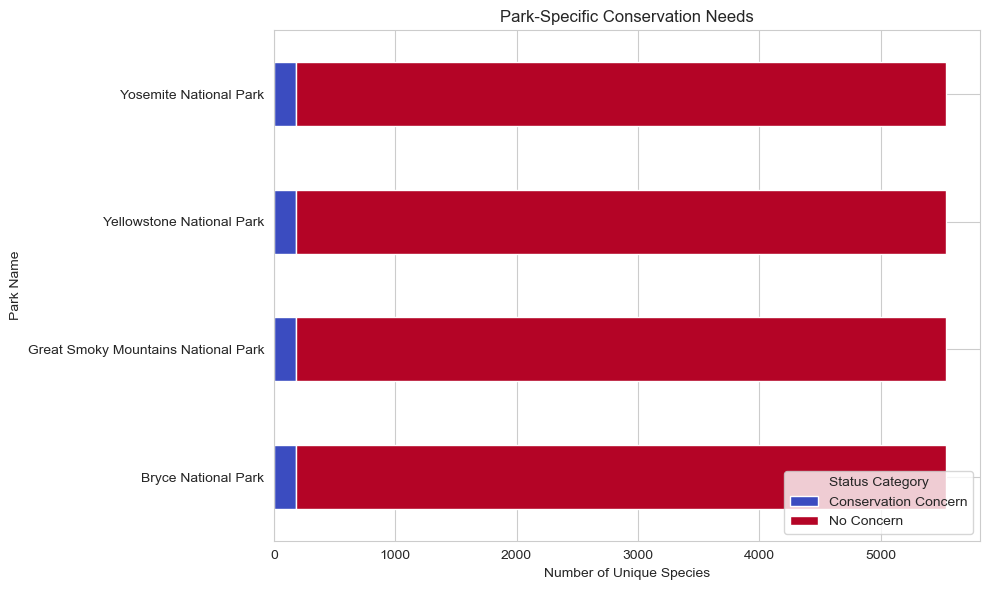

In [56]:
# Merge species and observations data on 'scientific_name'
merged_data = pd.merge(observations, species, on='scientific_name')

# Create a column to label species as 'Conservation Concern' or 'No Concern'
merged_data['conservation_status'] = merged_data['conservation_status'].fillna('No Concern')
merged_data['status_category'] = merged_data['conservation_status'].apply(
    lambda x: 'Conservation Concern' if x != 'No Concern' else 'No Concern'
)

# Count species under each category per park
park_status_counts = merged_data.groupby(['park_name', 'status_category'])['scientific_name'].nunique().unstack()

# Plot a horizontal stacked bar chart
park_status_counts.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Park-Specific Conservation Needs')
plt.xlabel('Number of Unique Species')
plt.ylabel('Park Name')
plt.legend(title='Status Category', loc='lower right')
plt.tight_layout()
plt.show()


### Conclusion

This project explored biodiversity data from the National Parks Service, analyzing species observations and their conservation statuses to uncover key insights. Here’s a summary of the process and findings:

1. **Data Loading and Exploration**:  
   - The datasets (*Species_info.csv* and *Observations.csv*) were loaded and inspected.  
   - The data provided details on species categories, scientific names, common names, conservation statuses, and their observations across various parks.

2. **Key Findings**:  
   - **Distribution of Conservation Status**:  
     A majority of species did not have a specified conservation status, indicating they were not at risk. However, species under "Endangered" and "Threatened" categories highlighted areas of concern.  
   - **Species Categories and Endangerment**:  
     Certain species categories, such as mammals and birds, had more species at risk, suggesting targeted conservation efforts may be required for these groups.  
   - **Statistical Significance of Conservation Status**:  
     A Chi-squared test revealed a statistically significant relationship between species categories and their conservation statuses, indicating that some categories are more vulnerable than others.  
   - **Most Spotted Species at Parks**:  
     The most frequently observed species in each park were identified, providing insights into dominant or highly visible species across park locations.

3. **Visualization and Analysis**:  
   - Bar charts and stacked plots were used to present the data visually, aiding in the understanding of distributions and relationships.
   - Statistical analysis validated observed trends, strengthening the reliability of conclusions.

4. **Challenges and Limitations**:  
   - The data contained many species with no conservation status, which limited the scope of understanding for certain categories.
   - The dataset, while informative, was fictional and may not represent real-world scenarios entirely.

5. **Final Thoughts**:  
   This analysis highlights the importance of monitoring biodiversity and conservation efforts. By identifying trends and significant relationships, park authorities can prioritize conservation initiatives and allocate resources effectively. Further studies could involve incorporating real-world datasets and expanding the scope to include temporal trends in species populations.

The findings from this project provide a foundational understanding of species distribution and their conservation statuses in national parks, serving as a basis for informed decision-making in biodiversity management.